<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/C6H6_benzene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Benzene (C₆H₆)**

**Density Functional Theory (DFT) self-consistent field (SCF)**

[Benzene](https://en.m.wikipedia.org/wiki/Benzene) is an organic chemical compound with the molecular formula C6H6. The benzene molecule is composed of six carbon atoms joined in a planar hexagonal ring with one hydrogen atom attached to each. Because it contains only carbon and hydrogen atoms, benzene is classed as a hydrocarbon.



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1825.png)


converged SCF energy = -232.309063756164
converged SCF energy = -232.309063756164


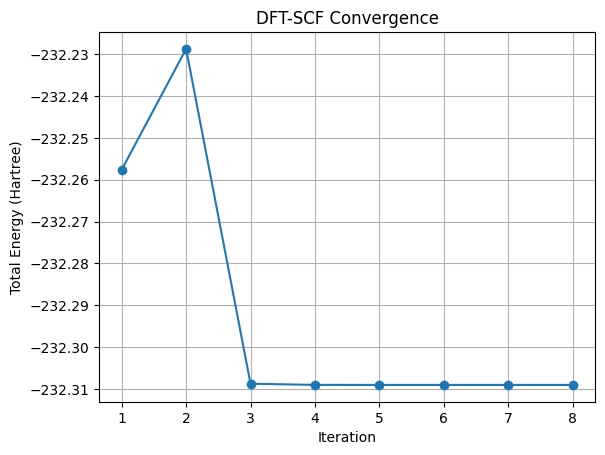

DFT energy for Benzene using B3LYP: -232.30906375616397 Hartree


In [ ]:
from pyscf import gto, dft
import matplotlib.pyplot as plt

# Step 1: Define molecule using gto.M() function. Provide atomic positions in angstroms and basis set (here: cc-pvdz)
mol = gto.M(
    atom = '''
        C    0.000000    1.396763    0.000000
        C    1.209587    0.698382    0.000000
        C    1.209587   -0.698382    0.000000
        C    0.000000   -1.396763    0.000000
        C   -1.209587   -0.698382    0.000000
        C   -1.209587    0.698382    0.000000
        H    0.000000    2.480310    0.000000
        H    2.146325    1.240155    0.000000
        H    2.146325   -1.240155    0.000000
        H    0.000000   -2.480310    0.000000
        H   -2.146325   -1.240155    0.000000
        H   -2.146325    1.240155    0.000000
    ''',
    basis = 'cc-pvdz',
)

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'tpss'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy for Benzene using B3LYP: {energy} Hartree")